<a href="https://colab.research.google.com/github/Yasir323/100-days-of-code/blob/master/OOP6_Descriptors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A descriptor is an object attribute with "binding behavior", one whose attribute access has been overridden by methods in the descriptor protocol. Those methods are \_\_get\_\_(), \_\_set\_\_(), and \_\_delete\_\_().

If any of those methods are defined for an object, it is said to be a descriptor.

Accessing a class attribute will start the lookup chain.

Let a closer look at what is happening. Assuming we have an object obj: What happens if we try to access an attribute (or property) ap? "Accesssing" the attribute means to "get" the value, so the attribute is used for example in a print function or inside of an expression. Both the obj and the class belong to type(obj) contain a dictionary attribute \_\_dict\_\_. This situation is viuslaized in the following diagram:


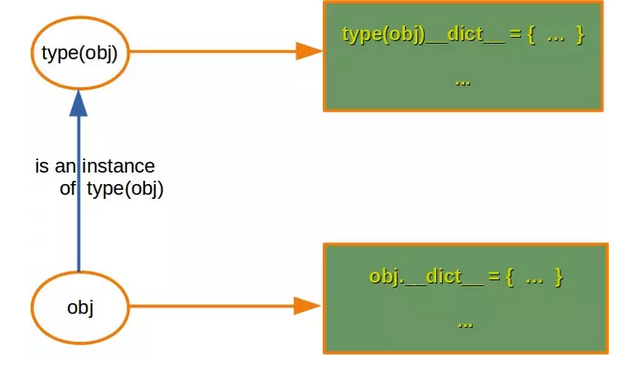

obj.ap has a lookup chain starting with obj.\_\_dict\_\_['ap'], i.e. checks if obj.ap is a key of the dictionary obj.\_\_dict\_\_['ap'].

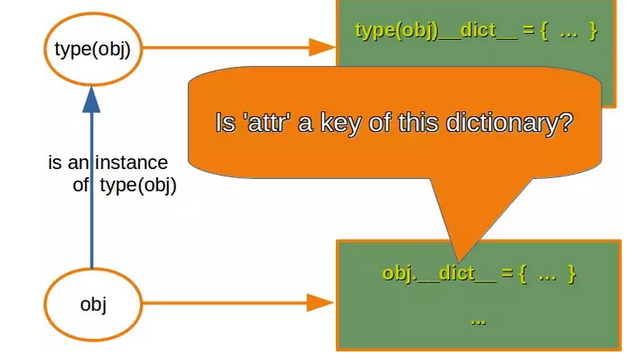

If ap is not a key of obj.\_\_dict\_\_, it will try to lookup type(obj).\_\_dict\_\_['ap'].

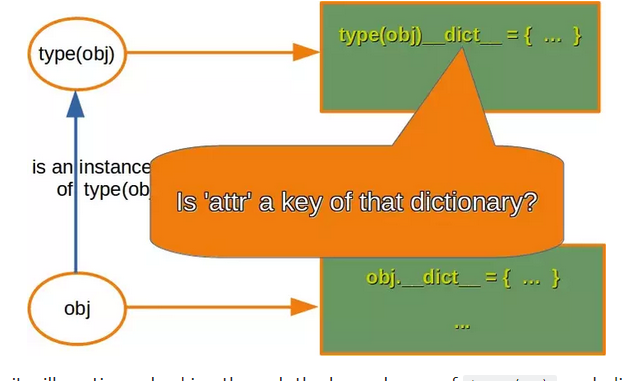

If obj is not contained in this dictionary either, it will continue checking through the base classes of type(ap) excluding metaclasses.

We demonstrate this in an example:

In [1]:
class A:
    ca_A = "Class attribute of A"

    def __init__(self):
        self.ia_A = "Instance attribute of A"


class B(A):
    ca_B = "Class attribute of B"

    def __init__(self):
        super().__init__()
        self.ia_B = "Instance attribute of B"

In [2]:
x = B()
print(x.ia_B)
print(x.ca_B)
print(x.ia_A)
print(x.ca_A)

Instance attribute of B
Class attribute of B
Instance attribute of A
Class attribute of A




If we call print(x.non_existing) we get the following exception:
```
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-4-119192d61d5e> in <module>
----> 1 print(x.non_existing)

AttributeError: 'B' object has no attribute 'non_existing'
```



If the looked-up value is an object defining one of the descriptor methods, then Python may override the default behavior and invoke the descriptor method instead. Where this occurs in the precedence chain depends on which descriptor methods were defined.

### Descriptor Protocol

The general descriptor protocol consists of three methods:
```
descr.__get__(self, obj, type=None) -> value

descr.__set__(self, obj, value) -> None

descr.__delete__(self, obj) -> None
```
If you define one or more of these methods, you will create a descriptor. We distinguish between data descriptors and non-data descriptors:

**non-data descriptor**:
    If we define only the __get__() method, we create a non-data descriptor, which are mostly used for methods.

**data descriptor**:
    If an object defines __set__() or __delete__(), it is considered a data descriptor. To make a read-only data descriptor, define both __get__() and __set__() with the __set__() raising an AttributeError when called. Defining the __set__() method with an exception raising placeholder is enough to make it a data descriptor. 
